In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
x = []
y = []

chem_data = pd.read_csv("/home/nirjhar/Python Codes/Fourier/BS-CH201 - Expt 3.csv")
chem_data

,No. of obs,Vol of acid taken (ml),No. of drops of NaOH added,Total no. of drops of NaOH added,Vol. of NaOH added (ml),Observed pH,ΔpH,ΔpH/ΔV
0,1,10.0,0,0,0.000,1.32,NaN,NaN
1,2,NaN,2,2,0.118,1.37,0.05,0.424
2,3,NaN,2,4,0.235,1.43,0.06,0.508
3,4,NaN,2,6,0.353,1.48,0.05,0.424
4,5,NaN,2,8,0.471,1.53,0.05,0.424
5,6,NaN,2,10,0.588,1.59,0.06,0.508
6,7,NaN,2,12,0.706,1.67,0.08,0.678
7,8,NaN,2,14,0.824,1.73,0.06,0.508
8,9,NaN,2,16,0.941,1.81,0.08,0.678
9,10,NaN,2,18,1.059,1.91,0.10,0.847


$\triangle$

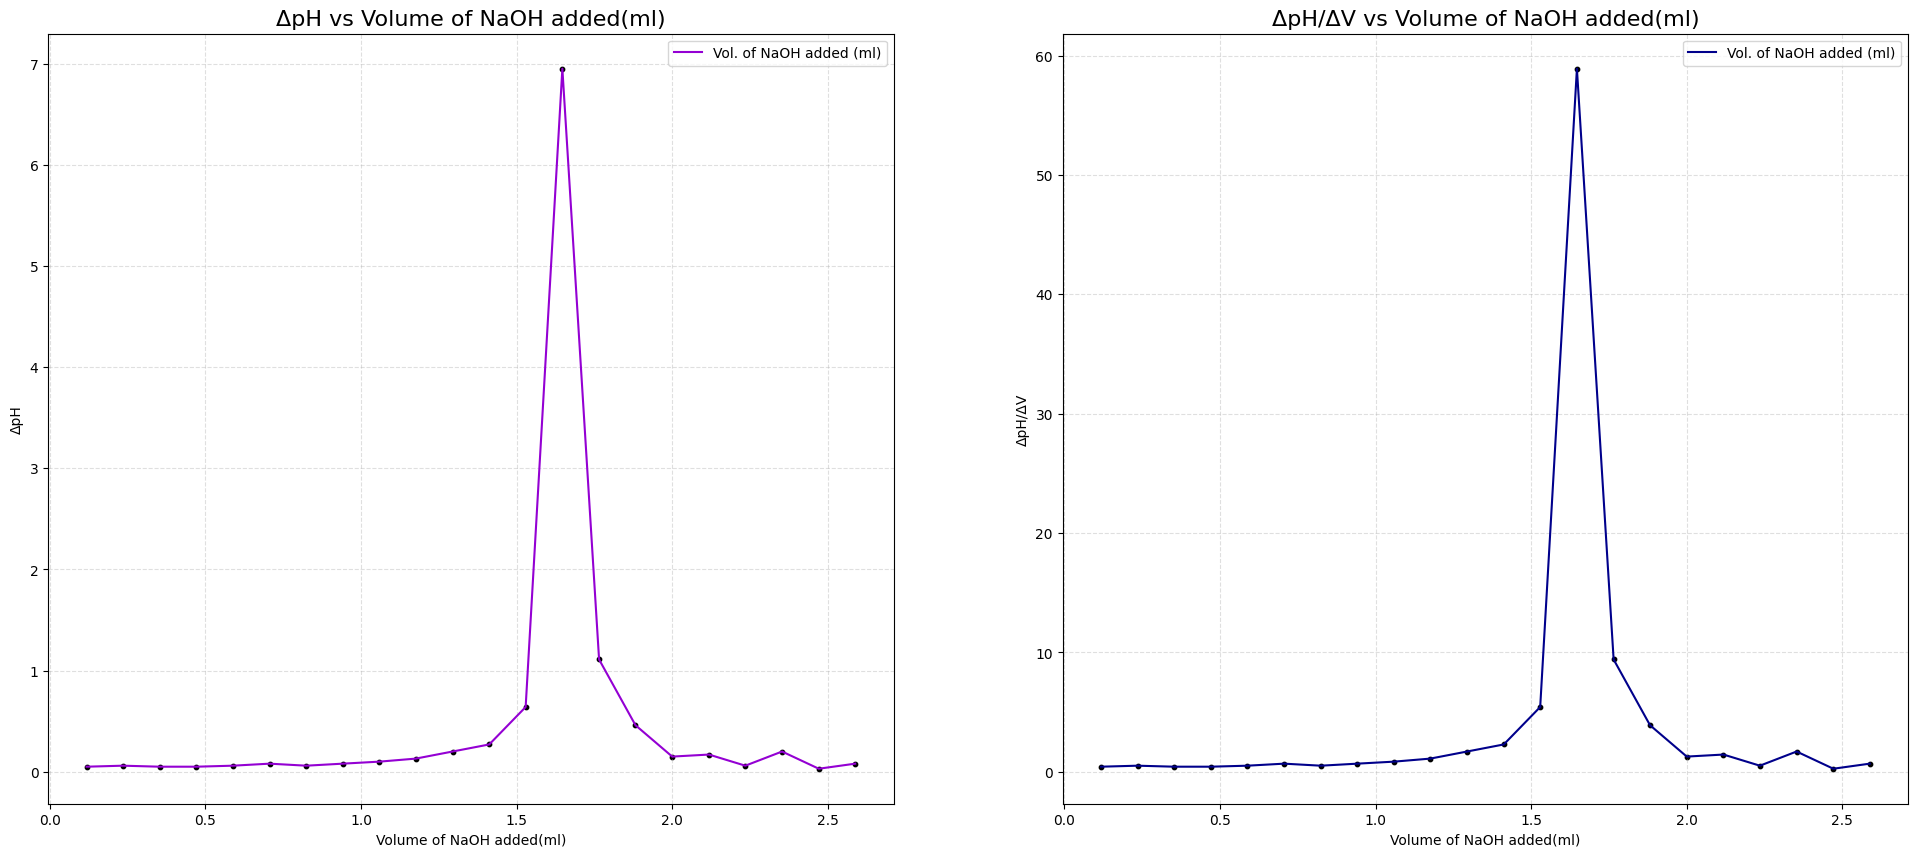

In [34]:
dph = chem_data["ΔpH"]
dph_dv = chem_data["ΔpH/ΔV"]
vol_NaOH = chem_data["Vol. of NaOH added (ml)"]

plt.figure(figsize=(24, 10))
plt.subplot(1, 2, 1)
plt.title("ΔpH vs Volume of NaOH added(ml)", fontsize=16)
plt.scatter(vol_NaOH, dph, s=10, c="black")
plt.plot(vol_NaOH, dph, c="darkviolet", label="Vol. of NaOH added (ml)")
plt.xlabel("Volume of NaOH added(ml)")
plt.ylabel("ΔpH")
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.subplot(1, 2, 2)
plt.title("ΔpH/ΔV vs Volume of NaOH added(ml)", fontsize=16)
plt.scatter(vol_NaOH, dph_dv, s=10, c="black")
plt.plot(vol_NaOH, dph_dv, c="darkblue", label="Vol. of NaOH added (ml)")
plt.xlabel("Volume of NaOH added(ml)")
plt.ylabel("ΔpH/ΔV")
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

In [1]:
import qrcode

# Data to encode
data = "https://example.com"

# Create QR code instance
qr = qrcode.QRCode(
    version=1,  # Controls the size of the QR code (1 is the smallest)
    error_correction=qrcode.constants.ERROR_CORRECT_L,  # Error correction level
    box_size=10,  # Size of each box
    border=4,  # Border thickness
)

# Add data to the QR code
qr.add_data(data)
qr.make(fit=True)

# Create an image of the QR code
img = qr.make_image(fill="black", back_color="white")

# Save the image
img.save("qrcode.png")

# Show the image
img.show()


Gtk-Message: 23:30:51.372: Failed to load module "gail"
Gtk-Message: 23:30:51.373: Failed to load module "atk-bridge"

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "adwaita",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate theme engine in module_path: "pixmap",

(gimp-2.10:2): Gtk-WARNING **: 23:30:51.378: Unable to locate th